In [1]:
%load_ext autoreload
%autoreload 2

from get_data import get_demos

demos = get_demos()


In [4]:
# import matplotlib.pyplot as plt

# plt.imshow(dataset[2][0].cpu().permute(1, 2, 0).numpy(), origin="lower")
# plt.show()

import quaternions

# Convert gripper matrix to quaternion
# These should be the same.
print(quaternions.rotation_matrix_to_quaternion(demos[0][0].gripper_matrix), demos[0][0].gripper_pose[3:])


[-1.09108115e-06  9.92670188e-01 -3.56293425e-06  1.20854867e-01] [-1.09108123e-06  9.92670238e-01 -3.56293435e-06  1.20854869e-01]


In [7]:
# Visualize direction of gripper on camera images
import demo_to_state_action_pairs
from voxel_renderer_slow import VoxelRenderer, SCENE_BOUNDS
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
renderer = VoxelRenderer(SCENE_BOUNDS, 224, torch.tensor([0, 0, 0], device=device), device=device)


/tmp/ipykernel_517135/1049379647.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


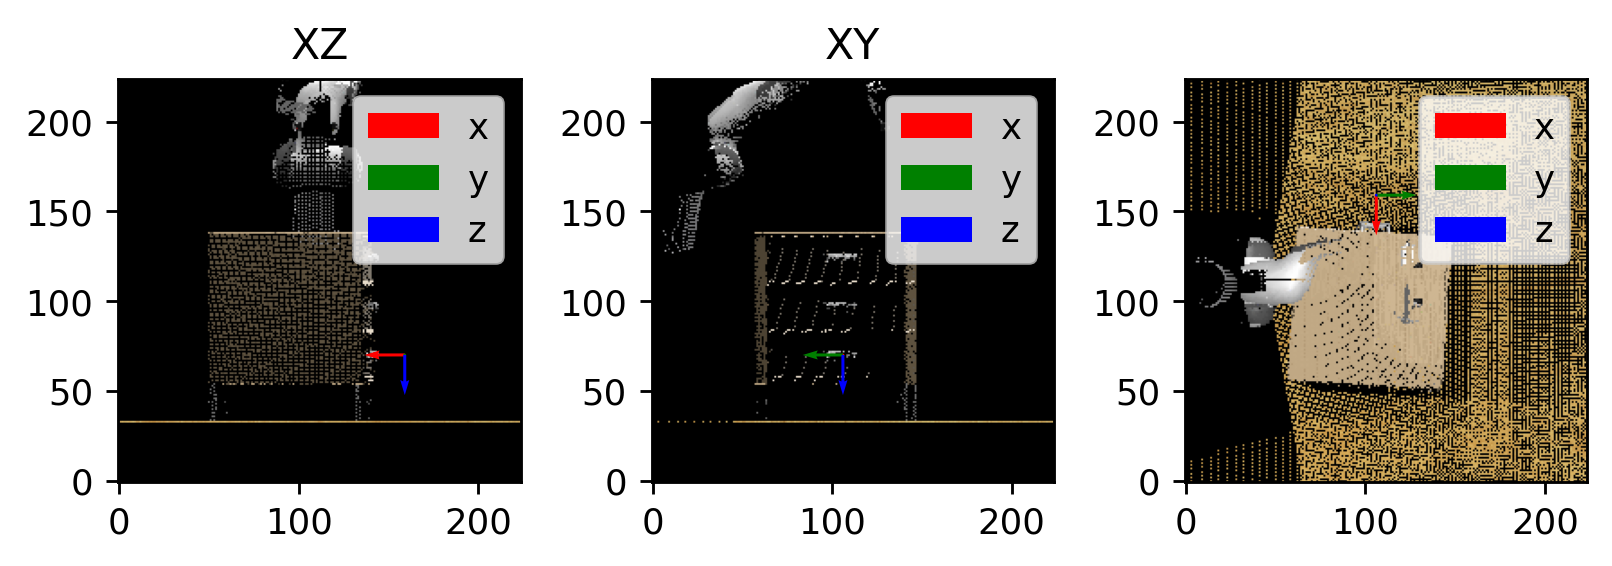

In [84]:
import matplotlib.pyplot as plt

demo = demos[0]
labels = demo_to_state_action_pairs.create_orthographic_labels_v2(demo, renderer)

((yz_image, xz_image, xy_image), (yz_pos, xz_pos, xy_pos), (yz_quat, xz_quat, xy_quat)) = labels[0]

def show_image_with_eef(image, pos, quat):
    plt.imshow(image.cpu().numpy(), origin="lower")

    # Render target gripper rotation
    quat_as_matrix = quaternions.quaternion_to_rotation_matrix(quat)

    # plot x, y, z axes of this matrix
    rotation_matrix_x, rotation_matrix_y, rotation_matrix_z = quat_as_matrix

    # print(rotation_matrix_x[:2])
    # print(rotation_matrix_y[:2])
    # print(rotation_matrix_z[:2])

    arrow_scale = 10
    plt.quiver(pos[0], pos[1], rotation_matrix_x[0], rotation_matrix_x[1], scale=arrow_scale, color='r', label='x')
    plt.quiver(pos[0], pos[1], rotation_matrix_y[0], rotation_matrix_y[1], scale=arrow_scale, color='g', label='y')
    plt.quiver(pos[0], pos[1], rotation_matrix_z[0], rotation_matrix_z[1], scale=arrow_scale, color='b', label='z')

    plt.legend()
    # plt.show()

### YZ IMAGE ###
plt.title("YZ")
plt.subplot(1, 3, 1)
show_image_with_eef(yz_image, yz_pos, yz_quat)
# print(quaternions.quaternion_to_rotation_matrix(quaternions.ROTATE_PERSPECTIVE_QUATERNION_TO_WORLD_QUATERNION['yz']))
# print((quaternions.ROTATE_PERSPECTIVE_QUATERNION_TO_WORLD_QUATERNION['yz']))

### XZ IMAGE ###
plt.title("XZ")
plt.subplot(1, 3, 2)
show_image_with_eef(xz_image, xz_pos, xz_quat)
# print(quaternions.quaternion_to_rotation_matrix(quaternions.ROTATE_PERSPECTIVE_QUATERNION_TO_WORLD_QUATERNION['xz']))
# print((quaternions.ROTATE_PERSPECTIVE_QUATERNION_TO_WORLD_QUATERNION['xz']))

### XY IMAGE ###
plt.title("XY")
plt.subplot(1, 3, 3)
show_image_with_eef(xy_image, xy_pos, xy_quat)
# print(quaternions.quaternion_to_rotation_matrix(quaternions.ROTATE_PERSPECTIVE_QUATERNION_TO_WORLD_QUATERNION['xy']))
# print((quaternions.ROTATE_PERSPECTIVE_QUATERNION_TO_WORLD_QUATERNION['xy']))

plt.tight_layout()
plt.rcParams['figure.dpi'] = 256
plt.show()
